ANÁLISIS EXPLORATORIO DE DATOS - VIDEOJUEGOS

1. EXPLORACIÓN BÁSICA
------------------------------
Primeras 5 filas:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  

Últimas 5 filas:
        Rank                  

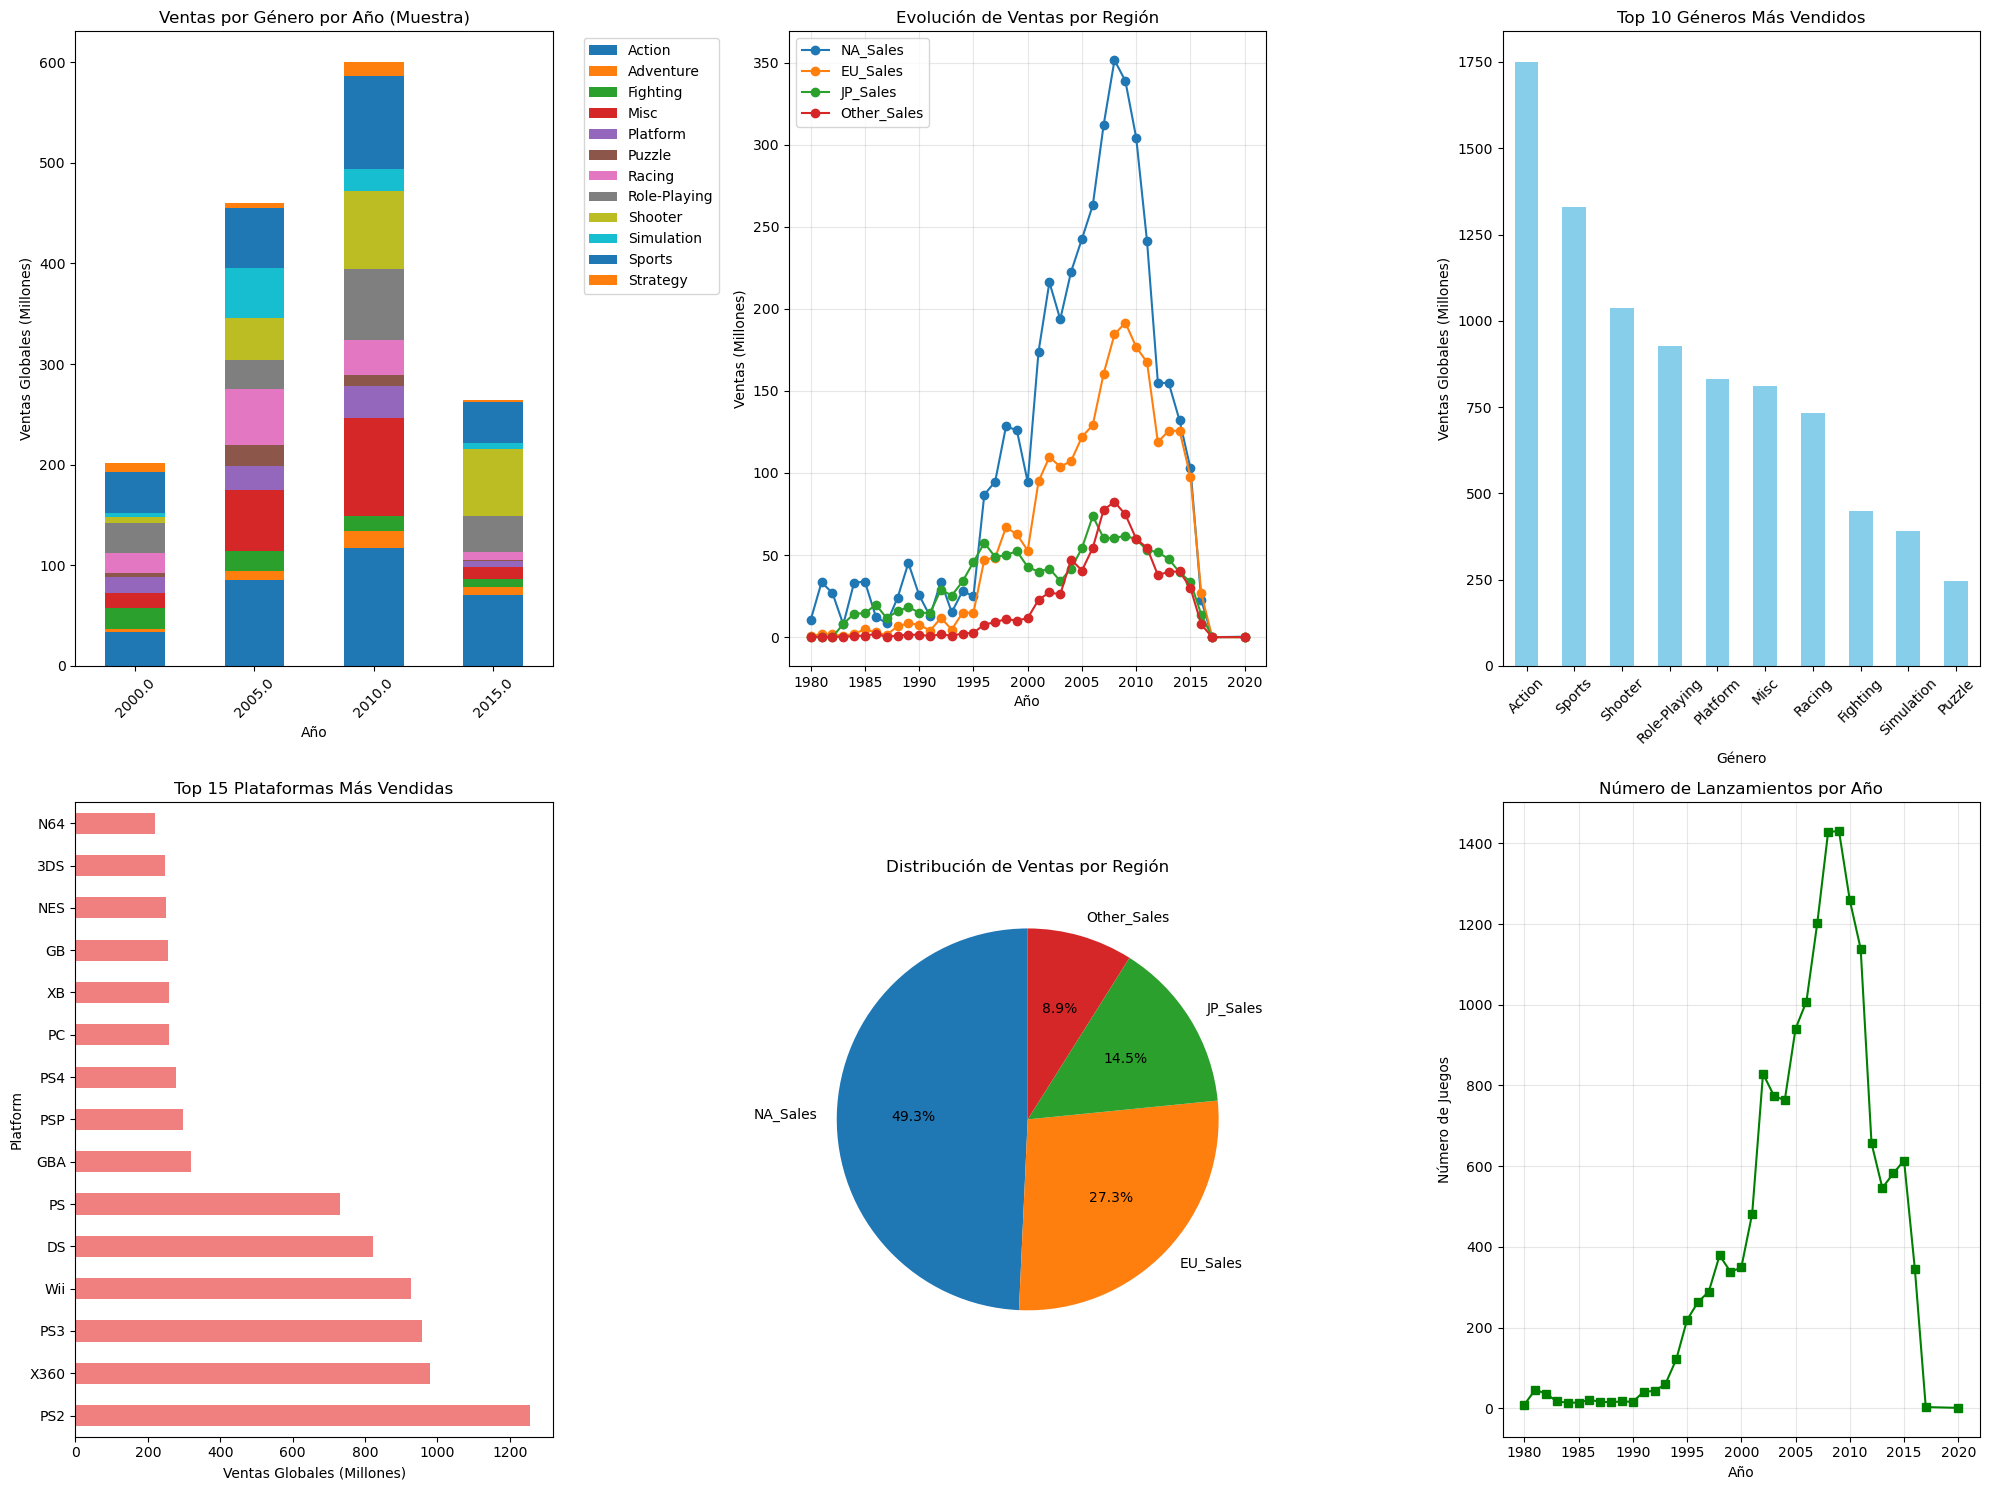



5. RESUMEN EJECUTIVO
------------------------------
📊 DATASET: 16,598 videojuegos, 12 géneros, 31 plataformas
📅 PERÍODO: 1980 - 2020
💰 VENTAS TOTALES: 8920.44 millones

🎮 TOP 3 JUEGOS MÁS VENDIDOS:
   1. Wii Sports (Wii) - 82.74M
   2. Super Mario Bros. (NES) - 40.24M
   3. Mario Kart Wii (Wii) - 35.82M

🏆 TOP 3 GÉNEROS MÁS VENDIDOS:
   1. Action - 1751.18M
   2. Sports - 1330.93M
   3. Shooter - 1037.37M

🎯 TOP 3 PLATAFORMAS MÁS VENDIDAS:
   1. PS2 - 1255.64M
   2. X360 - 979.96M
   3. PS3 - 957.84M

🌍 VENTAS POR REGIÓN:
   • Norteamérica: 4392.95M (49.2%)
   • Europa: 2434.13M (27.3%)
   • Japón: 1291.02M (14.5%)
   • Otros: 797.75M (8.9%)

ANÁLISIS COMPLETADO


In [3]:
# ================================
# ANÁLISIS EXPLORATORIO DE DATOS (EDA) - VIDEOJUEGOS
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lectura del archivo
df = pd.read_csv('vgsales.csv')

print("=" * 60)
print("ANÁLISIS EXPLORATORIO DE DATOS - VIDEOJUEGOS")
print("=" * 60)

# ================================
# EXPLORACIÓN BÁSICA
# ================================

print("\n1. EXPLORACIÓN BÁSICA")
print("-" * 30)

print("Primeras 5 filas:")
print(df.head())

print("\nÚltimas 5 filas:")
print(df.tail())

print("\nMuestra aleatoria de 5 filas:")
print(df.sample(5, random_state=42))

print("\nInformación del dataset:")
print(df.info())

print("\nTipos de datos:")
print(df.dtypes)

# Validar columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nColumnas numéricas: {numeric_cols}")

print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())

# ================================
# TOTALES GENERALES
# ================================

print("\n\n2. TOTALES GENERALES")
print("-" * 30)

total_videojuegos = len(df)
total_generos = df['Genre'].nunique()
total_plataformas = df['Platform'].nunique()

print(f"1) Total de videojuegos analizados: {total_videojuegos:,}")
print(f"2) Total de géneros analizados: {total_generos}")
print(f"3) Total de plataformas analizadas: {total_plataformas}")

print(f"\nGéneros disponibles: {sorted(df['Genre'].unique())}")
print(f"\nPlataformas disponibles: {sorted(df['Platform'].unique())}")

# ================================
# ANÁLISIS DE VENTAS
# ================================

print("\n\n3. ANÁLISIS DE VENTAS")
print("-" * 30)

# 1) Total de ventas por año
print("\n1) TOTAL DE VENTAS POR AÑO (en millones)")
ventas_por_año = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(ventas_por_año.head(10))

# 2) Juegos más vendidos por año (top 3 por año)
print("\n2) JUEGOS MÁS VENDIDOS POR AÑO (Top 3)")
top_juegos_año = df.loc[df.groupby('Year')['Global_Sales'].idxmax()]
print(top_juegos_año[['Year', 'Name', 'Platform', 'Genre', 'Global_Sales']].head(10))

# 3) Plataformas con más ingresos por año
print("\n3) PLATAFORMAS CON MÁS INGRESOS POR AÑO")
plataformas_año = df.groupby(['Year', 'Platform'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
top_plataformas_año = plataformas_año.groupby('Year')['Global_Sales'].idxmax()
print("Top plataforma por año (primeros 10):")
for year, (year_idx, platform) in list(top_plataformas_año.head(10).items()):
    sales = plataformas_año.loc[(year, platform), 'Global_Sales']
    print(f"{year}: {platform} - {sales:.2f} millones")

# ================================
# GRÁFICOS
# ================================

print("\n\n4. GENERANDO GRÁFICOS...")
print("-" * 30)

# Configurar estilo
plt.style.use('default')
fig = plt.figure(figsize=(20, 15))

# 4) Gráfico de comparación de ventas entre géneros por año
plt.subplot(2, 3, 1)
ventas_genero_año = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack(fill_value=0)
# Mostrar solo algunos años para claridad
años_muestra = [2000, 2005, 2010, 2015]
ventas_genero_muestra = ventas_genero_año.loc[ventas_genero_año.index.isin(años_muestra)]
ventas_genero_muestra.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Ventas por Género por Año (Muestra)')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (Millones)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Insight 1: Evolución de ventas por región a lo largo del tiempo
plt.subplot(2, 3, 2)
ventas_region_año = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
ventas_region_año.plot(kind='line', ax=plt.gca(), marker='o')
plt.title('Evolución de Ventas por Región')
plt.xlabel('Año')
plt.ylabel('Ventas (Millones)')
plt.legend()
plt.grid(True, alpha=0.3)

# Insight 2: Top 10 géneros más vendidos globalmente
plt.subplot(2, 3, 3)
top_generos = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_generos.plot(kind='bar', ax=plt.gca(), color='skyblue')
plt.title('Top 10 Géneros Más Vendidos')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (Millones)')
plt.xticks(rotation=45)

# Insight 3: Distribución de ventas por plataforma (Top 15)
plt.subplot(2, 3, 4)
top_plataformas = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(15)
top_plataformas.plot(kind='barh', ax=plt.gca(), color='lightcoral')
plt.title('Top 15 Plataformas Más Vendidas')
plt.xlabel('Ventas Globales (Millones)')

# Insight 4: Comparación de mercados regionales
plt.subplot(2, 3, 5)
ventas_regionales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.pie(ventas_regionales.values, labels=ventas_regionales.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Ventas por Región')

# Insight 5: Tendencia de lanzamientos por año
plt.subplot(2, 3, 6)
lanzamientos_año = df['Year'].value_counts().sort_index()
lanzamientos_año.plot(kind='line', ax=plt.gca(), marker='s', color='green')
plt.title('Número de Lanzamientos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Juegos')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ================================
# RESUMEN EJECUTIVO
# ================================

print("\n\n5. RESUMEN EJECUTIVO")
print("-" * 30)

print(f"📊 DATASET: {total_videojuegos:,} videojuegos, {total_generos} géneros, {total_plataformas} plataformas")
print(f"📅 PERÍODO: {df['Year'].min():.0f} - {df['Year'].max():.0f}")
print(f"💰 VENTAS TOTALES: {df['Global_Sales'].sum():.2f} millones")

print(f"\n🎮 TOP 3 JUEGOS MÁS VENDIDOS:")
top_3_juegos = df.nlargest(3, 'Global_Sales')[['Name', 'Platform', 'Global_Sales']]
for i, (_, row) in enumerate(top_3_juegos.iterrows(), 1):
    print(f"   {i}. {row['Name']} ({row['Platform']}) - {row['Global_Sales']:.2f}M")

print(f"\n🏆 TOP 3 GÉNEROS MÁS VENDIDOS:")
top_3_generos = df.groupby('Genre')['Global_Sales'].sum().nlargest(3)
for i, (genero, ventas) in enumerate(top_3_generos.items(), 1):
    print(f"   {i}. {genero} - {ventas:.2f}M")

print(f"\n🎯 TOP 3 PLATAFORMAS MÁS VENDIDAS:")
top_3_plat = df.groupby('Platform')['Global_Sales'].sum().nlargest(3)
for i, (plat, ventas) in enumerate(top_3_plat.items(), 1):
    print(f"   {i}. {plat} - {ventas:.2f}M")

print(f"\n🌍 VENTAS POR REGIÓN:")
print(f"   • Norteamérica: {df['NA_Sales'].sum():.2f}M ({df['NA_Sales'].sum()/df['Global_Sales'].sum()*100:.1f}%)")
print(f"   • Europa: {df['EU_Sales'].sum():.2f}M ({df['EU_Sales'].sum()/df['Global_Sales'].sum()*100:.1f}%)")
print(f"   • Japón: {df['JP_Sales'].sum():.2f}M ({df['JP_Sales'].sum()/df['Global_Sales'].sum()*100:.1f}%)")
print(f"   • Otros: {df['Other_Sales'].sum():.2f}M ({df['Other_Sales'].sum()/df['Global_Sales'].sum()*100:.1f}%)")

print("\n" + "=" * 60)
print("ANÁLISIS COMPLETADO")
print("=" * 60)

In [2]:
# =========================================
# CRECIMIENTO (ÚLTIMOS 4 AÑOS) - vgsales.csv
# =========================================

import pandas as pd
import numpy as np

# 1) Leer archivo
df = pd.read_csv('vgsales.csv')

# Asegurar tipo de año entero (y quitar nulos)
df = df.dropna(subset=['Year']).copy()
df['Year'] = df['Year'].astype(int)

# Tomar los últimos 4 años disponibles en el dataset
years = sorted(df['Year'].unique())
last4 = years[-4:]
print("Últimos 4 años analizados:", last4)

# Función auxiliar: crecimiento simple (último año - primer año) sobre Global_Sales
def simple_growth(pivot_df):
    pivot_df = pivot_df.reindex(columns=last4).fillna(0)
    return (pivot_df[last4[-1]] - pivot_df[last4[0]]).sort_values(ascending=False)

# -----------------------------
# 2) Crecimiento por GÉNERO
# -----------------------------
gen = (
    df[df['Year'].isin(last4)]
    .groupby(['Genre','Year'])['Global_Sales'].sum()
    .unstack()
    .fillna(0)
)
gen_growth = simple_growth(gen)

print("\nGénero con MAYOR crecimiento (últimos 4 años):")
print(f"{gen_growth.index[0]}: {gen_growth.iloc[0]:.2f}M")

print("\nGénero con MENOR crecimiento (últimos 4 años):")
print(f"{gen_growth.index[-1]}: {gen_growth.iloc[-1]:.2f}M")

# -----------------------------
# 3) Crecimiento por PLATAFORMA
# -----------------------------
plat = (
    df[df['Year'].isin(last4)]
    .groupby(['Platform','Year'])['Global_Sales'].sum()
    .unstack()
    .fillna(0)
)
plat_growth = simple_growth(plat)

print("\nPlataforma con MAYOR crecimiento (últimos 4 años):")
print(f"{plat_growth.index[0]}: {plat_growth.iloc[0]:.2f}M")

print("\nPlataforma con MENOR crecimiento (últimos 4 años):")
print(f"{plat_growth.index[-1]}: {plat_growth.iloc[-1]:.2f}M")

# -----------------------------
# 4) Crecimiento por VIDEOJUEGO
# -----------------------------
game = (
    df[df['Year'].isin(last4)]
    .groupby(['Name','Year'])['Global_Sales'].sum()
    .unstack()
    .fillna(0)
)
game_growth = simple_growth(game)

print("\nVideojuego con MAYOR crecimiento (últimos 4 años):")
print(f"{game_growth.index[0]}: {game_growth.iloc[0]:.2f}M")

print("\nVideojuego con MENOR crecimiento (últimos 4 años):")
print(f"{game_growth.index[-1]}: {game_growth.iloc[-1]:.2f}M")

# -----------------------------
# 5) Oportunidades de mercado
# -----------------------------
def regional_growth(group_col, region_col):
    tmp = (
        df[df['Year'].isin(last4)]
        .groupby([group_col, 'Year'])[region_col]
        .sum()
        .unstack()
        .fillna(0)
        .reindex(columns=last4)
    )
    return (tmp[last4[-1]] - tmp[last4[0]]).sort_values(ascending=False)

# Oportunidad 1: Género con mayor crecimiento en Japón
genre_jp_growth = regional_growth('Genre', 'JP_Sales')
print("\nOportunidad 1 - Género con mayor crecimiento en Japón:")
print(f"{genre_jp_growth.index[0]}: {genre_jp_growth.iloc[0]:.2f}M")

# Oportunidad 2: Plataforma con mayor crecimiento en Europa
platform_eu_growth = regional_growth('Platform', 'EU_Sales')
print("\nOportunidad 2 - Plataforma con mayor crecimiento en Europa:")
print(f"{platform_eu_growth.index[0]}: {platform_eu_growth.iloc[0]:.2f}M")

Últimos 4 años analizados: [2015, 2016, 2017, 2020]

Género con MAYOR crecimiento (últimos 4 años):
Puzzle: -0.70M

Género con MENOR crecimiento (últimos 4 años):
Action: -70.70M

Plataforma con MAYOR crecimiento (últimos 4 años):
DS: 0.29M

Plataforma con MENOR crecimiento (últimos 4 años):
PS4: -115.30M

Videojuego con MAYOR crecimiento (últimos 4 años):
Imagine: Makeup Artist: 0.29M

Videojuego con MENOR crecimiento (últimos 4 años):
Call of Duty: Black Ops 3: -25.32M

Oportunidad 1 - Género con mayor crecimiento en Japón:
Strategy: -0.15M

Oportunidad 2 - Plataforma con mayor crecimiento en Europa:
DS: 0.00M
